# Perspective Transformation Using Linear Equations
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: July 21, 2022

<center><img src="res/l02/transformation.png" width="800"/></center>

## Load modules
In this section, we need `NumPy` to implement the matrix calculation, and use `Matplotlib` to visually validate our results.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Define 2D points
###  Augmented vector
We can define a list of 2D points, $P\in \mathbb{R}^{3\times n}$, where $n$ is the number of points, as below:

$$
P = \begin{bmatrix}
        x\\    y\\   1
    \end{bmatrix}
\tag{1}
$$

Noted that we need the third element, 1, for linear transformation. This form of vector is also known as "augmented vector".

In [6]:
# use lists to describe each vector: x, y, and intercept
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4

# put them in a numpy array
P = np.array([x,
              y,
              i])

# print
print("P \n", P)

P 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]


### Visualize the vector
Visualize the vector P on a XY coordinate plane

(0.0, 50.0)

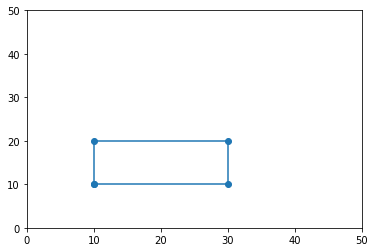

In [15]:
# we don't need the intercept at this point, so we can use "_" to represent it
x, y, _ = P

# to complete a shape, append the array by the first element
# e.g., from [0, 1, 2, 3] to [0, 1, 2, 3, 0]
x = np.append(x, x[0])
y = np.append(y, y[0])

# use 'o' to mark each data point
plt.plot(x, y, marker='o')
# set boundaries
plt.xlim(0, 50)
plt.ylim(0, 50)

#### Exercise 1
Wrap up the scripts to a Python function that plots a closed shape from an input vector $P$.

In [ ]:
def plot_shape(P, label=""):
    """ visualize a closed shape defined by a list 2D points

    Parameters
    ----------
    P : array_like
        a NumPy array in a shape of (3, 4). The first axis should contain
        xy-coordinate values in an order of [x, y, 1]
    label : str, optional
        plot legend label, by default ""
    """
    plt.plot(___FILL_IN___, label=label)

# test your function
plot_shape(P)

## Move the shape
### The intuitive way

P: 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]
Phat: 
 [[25 45 45 25]
 [25 25 35 35]
 [16 16 16 16]]


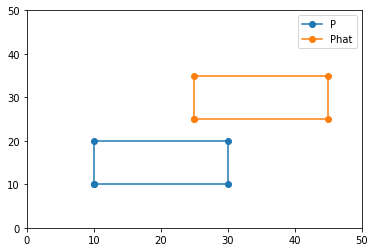

In [125]:
# intuitively move the entire matrix
Phat = P + 15
print("P: \n", P)
print("Phat: \n", Phat)

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

### Linear algebra

We can express the relationship in the following linear equations:

$$
\begin{split}
x + 0y + t_x &= x' \\
0x + y + t_y &= y' \\
0x + 0y + 1 &= 1
\end{split}
$$

where $x'$, $y'$ are the newly obtained coordinates after moving the $x$ and $y$ coordinates by $t_x$ and $t_y$ units, respectively.

And we can represent the equations using linear algebra:

$$
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y \\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}

\tag{2}
$$

Or

$$
\hat{P}
=
\begin{bmatrix}
    I & t \\
    0^T & 1
\end{bmatrix}
P

\tag{3}
$$

where

$$
\hat{P}
=
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
,\;

P
=
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}
,\;

t
=
\begin{bmatrix}
    t_x \\ t_y
\end{bmatrix}
,\;

I
=
\begin{bmatrix}
    1 & 0 \\
    0 & 1
\end{bmatrix}

$$

#### Exercise 2
Define a function allowing users to move $P$ by (`tx`, `ty`). Hint: use `np.matmul()` to implement matrix multiplication.

In [ ]:
def move_shape(P, tx, ty):
    """Move points P by tx on x-axis and ty on y-axis

    Parameters
    ----------
    P : array_like
        a NumPy array in a shape of (3, 4). The first axis should contain
        xy-coordinate values in an order of [x, y, 1]
    tx : int
        move P by tx units on x-axis
    ty : int
        move P by ty units on y-axis

    Returns
    -------
    P_hat: array_like
        new coordinates that are moved from P by (tx, ty) units.
    """
    pass

# validate the result
Phat = move_shape(P, tx=5, ty=15)
# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

## Rotate the shape
If we futher define other elements in the transformation matrix, we are able to rotate $P$ by any specific angle. We can re-define the transformation as:

$$
\hat{P}
=
\begin{bmatrix}
    R & t \\
    0^T & 1
\end{bmatrix}
P
\tag{4}
$$

where

$$
\hat{P}
=
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
,\;

P
=
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}
,\;

t
=
\begin{bmatrix}
    t_x \\ t_y
\end{bmatrix}
,\;

R =
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} & \cos{\theta}
\end{bmatrix}

$$


#### Exercise 3
Define a function allowing users to move $P$ by (`tx`, `ty`) and rotate $P$ by `angle` degrees. Hint: use `np.sin()` and `np.cos()`


In [ ]:
def move_shape_v2(P, tx, ty, angle=0):
    # convert from angle degree to radian
    radian = angle * np.pi / 180
    pass

# validate the result
Phat = move_shape_v2(P, tx=5, ty=15, angle=30)

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

## Perspective transformation
Ultimately, we want to transform $P$ to any arbitrary shape $\hat{P}$. Here we can define a transformation matrix $H \in \mathbb{R}^{3\times 3}$ following the relationship:

### Homography matrix $H$

$$
\hat{P}
=
HP

=
\begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23} \\
    h_{31} & h_{32} & h_{33} \\
\end{bmatrix}
P
\tag{5}
$$

We can set $h_{33}=1$. The constraint standardizes the vector length and reduces the degree of freedom by one.

$$
    h_{11}x + h_{12}y + h_{13} = \hat{x}
\tag{6}
$$

$$
    h_{21}x + h_{22}y + h_{23} = \hat{y}
\tag{7}
$$
$$
    h_{31}x + h_{32}y + 1 = 1
\tag{8}
$$

We can obtain the equation $(9)$ from $(6)$ and $(8)$.

$$
    \begin{split}
        h_{11}x + h_{12}y + h_{13} - h_{31}x\hat{x} - h_{32}y\hat{x} = \hat{x} \\
    \end{split}
    \tag{9}
$$

Same rule derives $(10)$ from $(7)$ and $(8)$
$$
    \begin{split}
        h_{21}x + h_{22}y + h_{23} - h_{31}x\hat{y} - h_{32}y\hat{y} = \hat{y}
    \end{split}
    \tag{10}
$$

The equations $(9)$ and $(10)$ can be represented in the linear algebra form

$$
    \begin{bmatrix}
        \hat{x} \\ \hat{y}
    \end{bmatrix}
=
    \begin{bmatrix}
        x & y & 1 & 0 & 0 & 0 & -x\hat{x} & -y\hat{x} \\
        0 & 0 & 0 & x & y & 1 & -x\hat{y} & -y\hat{y}
    \end{bmatrix}

    \begin{bmatrix}
        h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32}
    \end{bmatrix}
    \tag{11}
$$

### Ordinary least squares
Does the equation $(11)$ look familiar? Yes, it is an ordinary least squares (OLS) problem!
$$
    y = X\beta + \epsilon
    \tag{12}
$$

where

$$
    y =
    \begin{bmatrix}
        \hat{x} \\ \hat{y}
    \end{bmatrix}
    ,\;

    X =
    \begin{bmatrix}
        x & y & 1 & 0 & 0 & 0 & -x\hat{x} & -y\hat{x} \\
        0 & 0 & 0 & x & y & 1 & -x\hat{y} & -y\hat{y}
    \end{bmatrix}
    ,\;

    \beta =
    \begin{bmatrix}
        h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32}
    \end{bmatrix}

$$



Minimize the error sum of squares (SSE)
$$
\begin{split}
    arg \min \epsilon^{T} \epsilon
        &= arg \min_{\beta} f(\beta)\\
        &= arg \min_{\beta}(X\beta - y)^T(X\beta - y) \\
        &= arg \min_{\beta}(\beta^TX^T - y^T)(X\beta - y) \\
        &= arg \min_{\beta}\beta^TX^TX\beta - y^TX\beta - \beta^TX^Ty + y^Ty \\
        &= arg \min_{\beta}2(\frac{1}{2}\beta^TX^TX\beta - \beta^TX^Ty) + y^Ty \\
\end{split}
$$

Find the partial derivatives of $f(\beta)$
$$
    \frac{\partial f}{\partial \beta} = \beta^TX^TX - X^Ty = 0
$$

$$
    \beta = (X^TX)^{-1}X^Ty
    \tag{13}
$$

### Work on small data

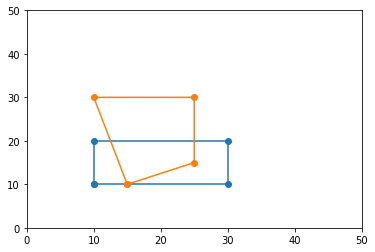

In [18]:
# define P
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4
P = np.array([x, y, i])
# define Phat
x = [15, 25, 25, 10]
y = [10, 15, 30, 30]
Phat = np.array([x, y, i])
# plotting
plot_shape(P)
plot_shape(Phat)

In [106]:
from LS import make_X, make_y, solve_LS, make_H, transform_P

In [129]:
X = make_X(P, Phat)
y = make_y(Phat)
print("P\n", P)
print("Phat\n", Phat)
print("X\n", X)
print("y\n", y)


P
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]
Phat
 [[15 25 25 10]
 [10 15 30 30]
 [ 1  1  1  1]]
X
 [[  10.   10.    1.    0.    0.    0. -150. -150.]
 [   0.    0.    0.   10.   10.    1. -100. -100.]
 [  30.   10.    1.    0.    0.    0. -750. -250.]
 [   0.    0.    0.   30.   10.    1. -450. -150.]
 [  30.   20.    1.    0.    0.    0. -750. -500.]
 [   0.    0.    0.   30.   20.    1. -900. -600.]
 [  10.   20.    1.    0.    0.    0. -100. -200.]
 [   0.    0.    0.   10.   20.    1. -300. -600.]]
y
 [[15]
 [10]
 [25]
 [15]
 [25]
 [30]
 [10]
 [30]]


In [94]:
beta = solve_LS(X, y)
H = make_H(beta)
print(H)

[[ 0.78571429 -0.71428571 12.14285714]
 [ 0.42857143  0.85714286 -4.28571429]
 [ 0.01428571 -0.02857143  1.        ]]


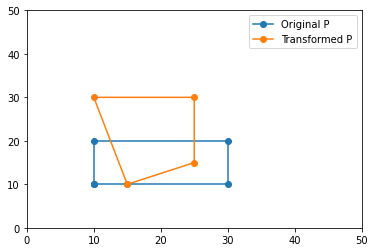

In [130]:
P_trsm = transform_P(P, H)
plot_shape(P, "Original P")
plot_shape(P_trsm, "Transformed P")
plt.legend()

### Transform a real image

In [132]:
from cv2 import warpPerspective
from image_handler import load_img


Dimension:  (1083, 3029, 3)


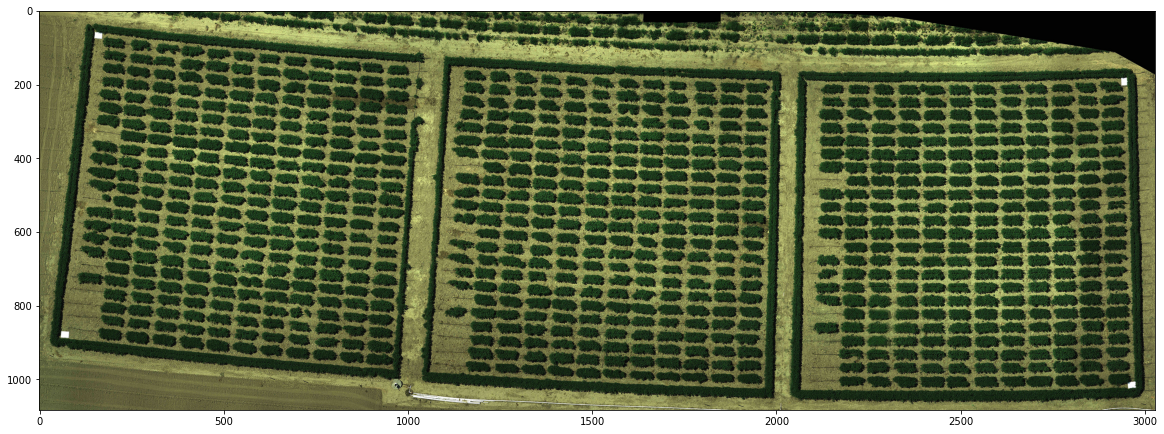

In [197]:
image = load_img("alfalfa.jpg")
plt.figure(figsize=(20, 10))
plt.imshow(image)
print("Dimension: ", image.shape)

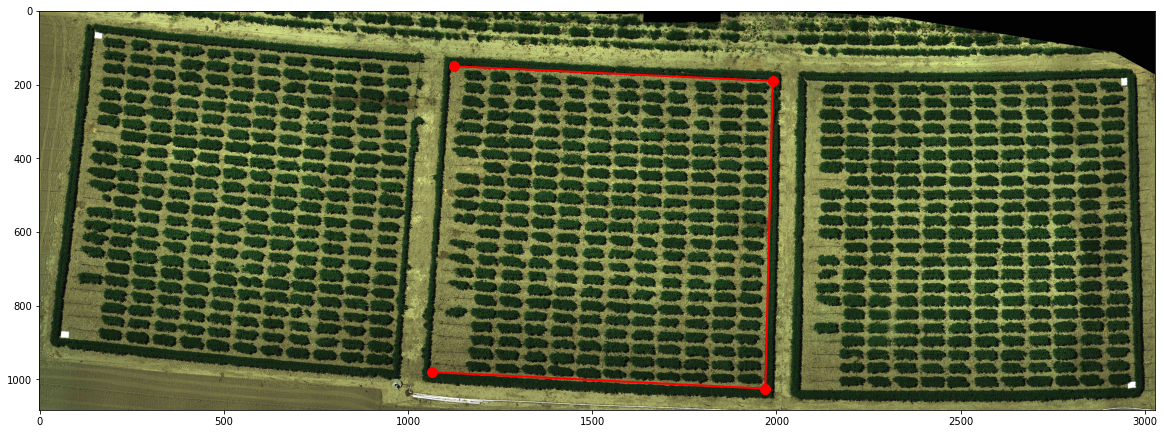

In [200]:
x = [1065, 1970, 1990, 1125]
y = [980, 1025, 190, 150]
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.plot(x, y, 'o-', linewidth=2, markersize=10, color='red')

In [202]:
P = np.array([x, y, [1] * 4])
h, w = 500, 500
Phat = np.array([[0, w, w, 0],
                 [0, 0, h, h],
                 [1, 1, 1, 1]])
print("P \n", P)
print("Phat \n", Phat)

P 
 [[1065 1970 1990 1125]
 [ 980 1025  190  150]
 [   1    1    1    1]]
Phat 
 [[  0 500 500   0]
 [  0   0 500 500]
 [  1   1   1   1]]


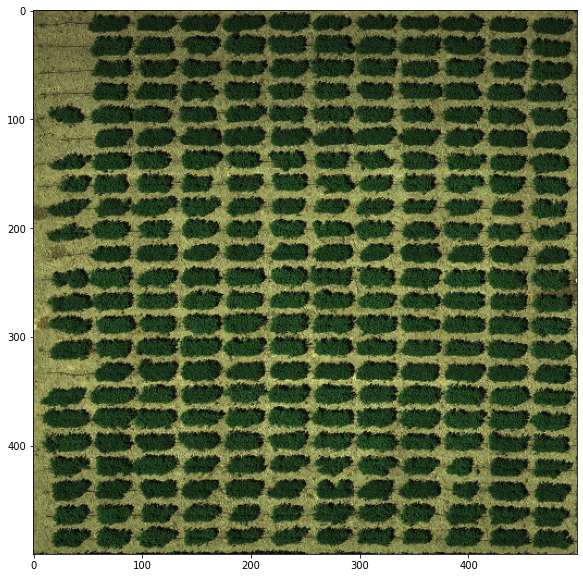

In [205]:
X = make_X(P, Phat)
y = make_y(Phat)
vec_H = solve_LS(X, y)
H = make_H(vec_H)
image_hat = warpPerspective(image.astype(np.float32), H, (500, 500))
image_hat = image_hat.astype(np.uint8)

# plotting
plt.figure(figsize=(10, 10))
plt.imshow(image_hat)